In [14]:
import pandas as pd
from pathlib import Path

import math

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/run_BaumBauenNotebooks')



from tb_to_csv import tabulate_metrics
from plot_fcts import curve_plot, multi_metric_bar_plot

In [15]:
data_names = ["multiModes_firstRun_10k_each_5trees_charge_noSmear" ,
"multiModes_firstRun_10k_each_5trees_IDs_charge_noSmear" ,
"multiModes_firstRun_10k_each_5trees_IDs_noSmear" ,
"multiModes_firstRun_10k_each_5trees_noSmear" ]

#["50k_realTree_IDs","50k_realTree_clean",'50k_realTree_IDs_charge',"50k_realTree_charge"]
specs = ["512_0.0001_128_0.3_4"]

Converting run events.out.tfevents.1621095336.naf-belle-gpu01.desy.de.140836.0

- Done
Converting run events.out.tfevents.1621096025.batchg003.desy.de.57502.0

- Done
2
300
1
2
Converting run events.out.tfevents.1621096026.batchg004.desy.de.12341.0

- Done
300
0
1
Converting run events.out.tfevents.1621096020.batchg002.desy.de.183876.0

- Done
300
0
1
Converting run events.out.tfevents.1620984842.naf-belle-gpu01.desy.de.216595.0

- Done
Converting run events.out.tfevents.1620986363.naf-belle-gpu01.desy.de.219152.0

- Done
Converting run events.out.tfevents.1620984688.naf-belle-gpu01.desy.de.216350.0

Run events.out.tfevents.1620984688.naf-belle-gpu01.desy.de.216350.0 is empty, didn't process it 

Converting run events.out.tfevents.1620828769.naf-belle-gpu01.desy.de.215258.0

Run events.out.tfevents.1620828769.naf-belle-gpu01.desy.de.215258.0 is empty, didn't process it 

Converting run events.out.tfevents.1620893243.naf-belle-gpu01.desy.de.69491.0

Run events.out.tfevents.1620893243.na

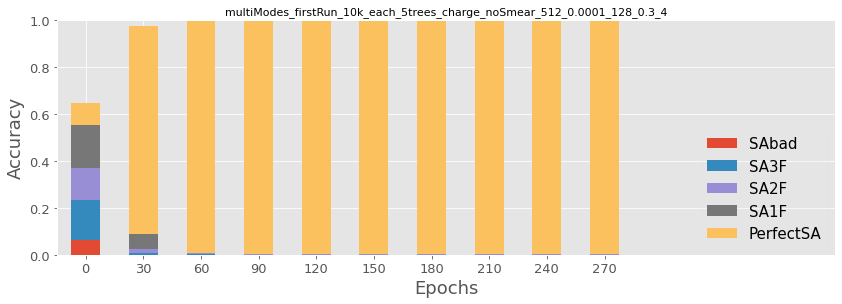

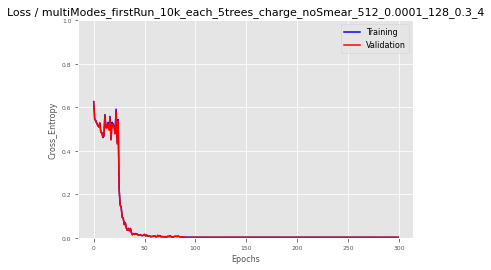

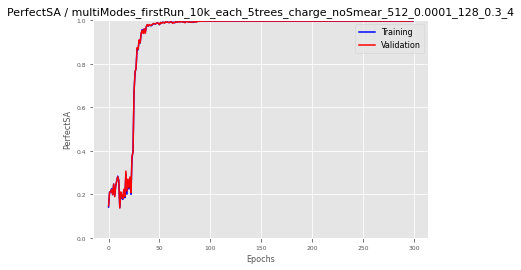

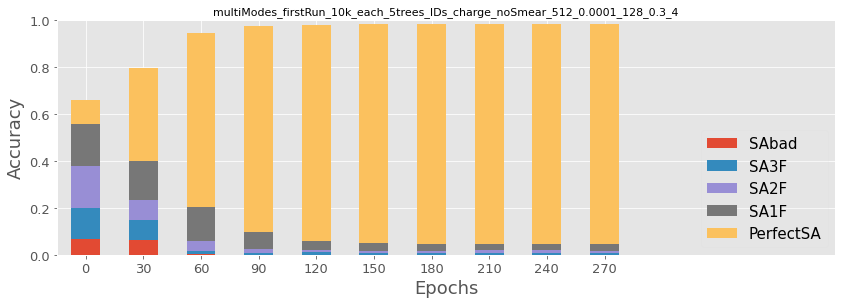

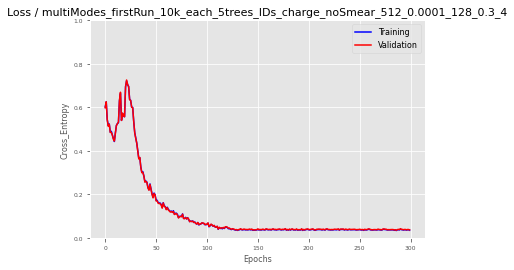

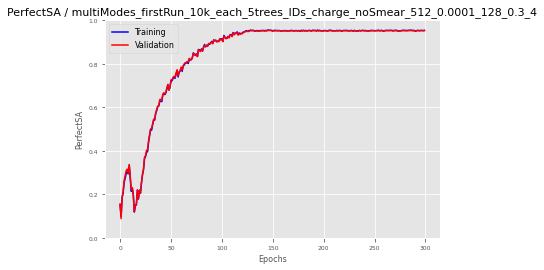

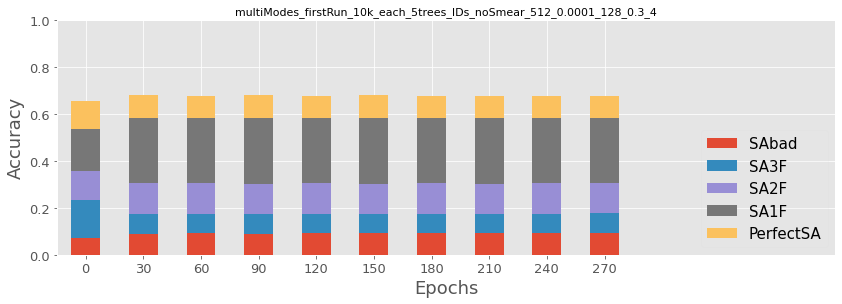

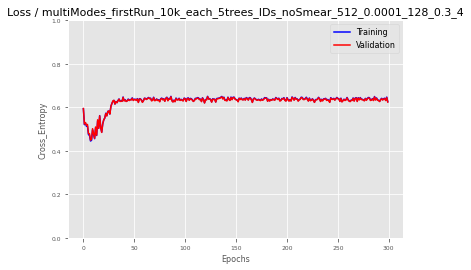

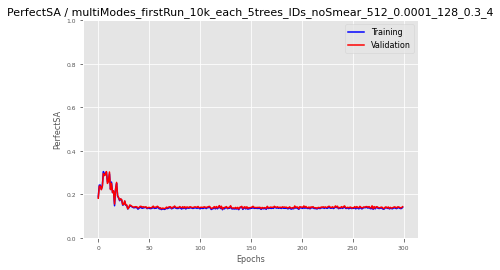

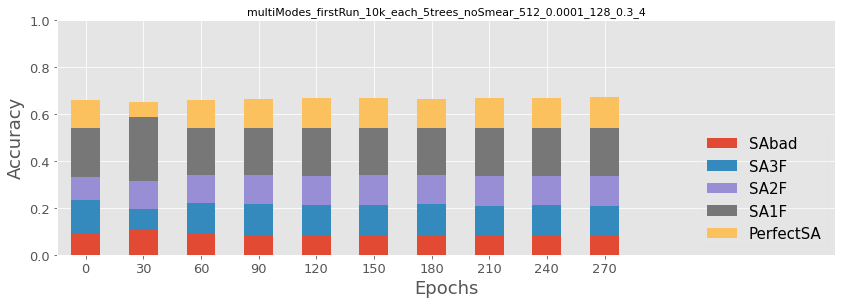

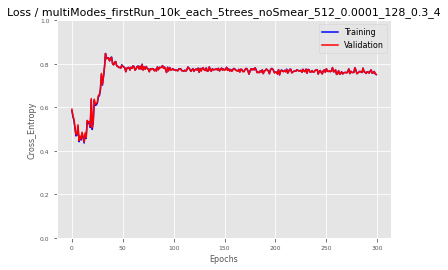

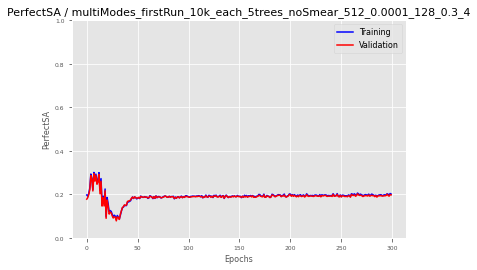

In [21]:
for data_name in data_names:
    for spec in specs:
        plotname_extension = data_name + '_' + spec
        
        nfs_path = "/nfs/dust/belle2/user/axelheim/BranchSeparator/run_realTree_separator/"

        plot_path = "/afs/desy.de/user/a/axelheim/private/run_realTree_separator/"
        
        
        data_dir = Path((nfs_path + 'tb_logs/' + data_name + '/' + spec))
        
        csv_dir = Path((nfs_path + 'tb_csv/' + data_name + '/' + spec))
        csv_dir.mkdir(parents=True, exist_ok=True)

        plot_path = Path((plot_path + 'plots/' + data_name + '/' + spec))
        plot_path.mkdir(parents=True, exist_ok=True)

        tb_metrics = tabulate_metrics(data_dir, csv_dir)

        
        # choosing the tb_log with the most epochs recorded
        epochs = []
        for i in range(len(tb_metrics)):
            epochs.append(len(tb_metrics[i]))
            print(epochs[i])
            
        most_epochs_idx = 0
        if len(tb_metrics) > 1:
            most_epochs_idx = epochs.index(max(epochs))
        
        print(most_epochs_idx)
        print(len(tb_metrics))
        longest_run = tb_metrics[most_epochs_idx]
        
        
        # the actual plots
        # bar plot
        steps = math.ceil(len(longest_run)/10)
        steps = int(math.ceil(steps / 5.0)) * 5
        multi_metric_bar_plot(longest_run, plot_path, ('barplot_metrics_' + plotname_extension), data_type="Validation", step=steps, metric_type="SA", title=plotname_extension)
        
        
        # loss plot
        loss_tr = longest_run['Cross Entropy/Training']
        loss_val = longest_run['Cross Entropy/Validation']
        curve_plot(loss_tr, loss_val, plot_path, ('loss_comparison_' + plotname_extension), 'Cross_Entropy', ('Loss / ' + plotname_extension))

        # perfect SA plot
        pLCA_tr = longest_run['PerfectSA/Training']
        pLCA_val = longest_run['PerfectSA/Validation']
        curve_plot(pLCA_tr, pLCA_val, plot_path, ('perfectSA_comparison_' + plotname_extension), 'PerfectSA', ('PerfectSA / ' + plotname_extension))